In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import numpy as np
import pandas as pd

from quantopian.pipeline.filters.morningstar import Q500US, Q1500US, Q3000US
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline

from quantopian.pipeline.data import EquityPricing
from quantopian.pipeline.data import morningstar

from alphalens.tears import create_information_tear_sheet, create_returns_tear_sheet
from alphalens.utils import get_clean_factor_and_forward_returns
import alphalens as al

from quantopian.pipeline.data.factset import Fundamentals

In [2]:
universe = Q500US()
start_date = '1995-01-01'
end_date='2018-01-01'

In [3]:
def make_pipeline():
    close = EquityPricing.close.latest
    volume = EquityPricing.volume.latest
    classification = morningstar.asset_classification.morningstar_industry_group_code.latest
    market_cap = Fundamentals.mkt_val_public.latest
    
    return Pipeline(
        columns={
            'prev_close':close,
            'prev_volume':volume,
            'marketcap':market_cap,
            'classification':classification
        },
        screen=universe
    )


def resample_returns(returns, freq='M'):
    return ((returns + 1).resample(freq).prod() - 1)

def IR(strat_returns, benchmark_returns, periods=12):

    strat_returns = resample_returns(strat_returns, 'M')
    benchmark_returns = resample_returns(benchmark_returns, 'M')
    
    active_returns = strat_returns -  benchmark_returns
    ttm_tracking_error = active_returns.rolling(periods).std() * np.sqrt(periods)
    
    ttm_active_returns = (active_returns+1).rolling(periods).agg(lambda x: x.prod()) -1
    
    
    return ttm_active_returns/ttm_tracking_error

In [4]:
pipe = make_pipeline()
data = run_pipeline(pipe, start_date, end_date)
pricing_data = get_pricing(data.index.levels[1], start_date, end_date, fields='close_price')


ValueError: Failed to find any assets with country_code 'US' that traded between 1995-01-03 00:00:00+00:00 and 1997-01-28 00:00:00+00:00.
This probably means that your asset db is old or that it has incorrect country/exchange metadata.

In [5]:
data['dollar_volume'] = -data['prev_close'] * data['prev_volume']
factor = 'marketcap'
merged_data = get_clean_factor_and_forward_returns(data[factor], pricing_data, quantiles=10)

NameError: name 'data' is not defined

In [12]:
benchmark_returns = merged_data.groupby(level=0)['1D'].mean()
mask = merged_data['factor_quantile'] == 10
strat_returns = merged_data[mask].groupby(level=0)['1D'].mean()

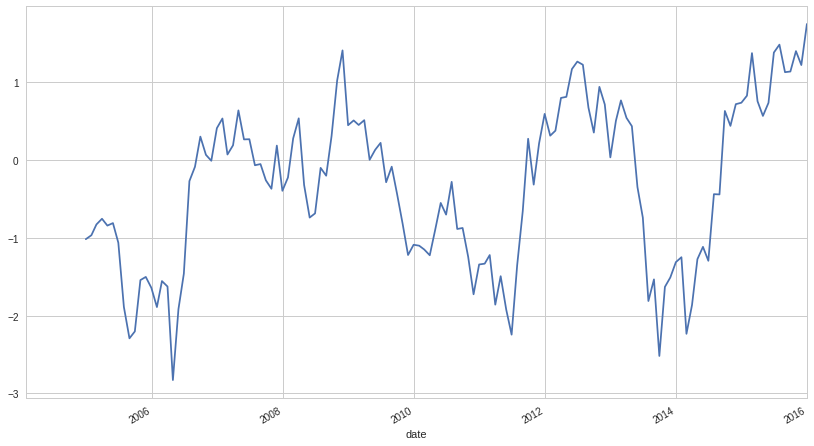

In [13]:
ir = IR(strat_returns, benchmark_returns)
ir.plot()

In [33]:
merged_data

1D        5D       10D  \
date                      asset                                                
2004-01-02 00:00:00+00:00 Equity(2 [HWM])       0.031993 -0.006658 -0.064278   
                          Equity(24 [AAPL])     0.046842  0.083747  0.068843   
                          Equity(60 [ABS])      0.021539  0.037824  0.067959   
                          Equity(62 [ABT])      0.001052 -0.037030 -0.069587   
                          Equity(114 [ADBE])    0.019160 -0.050615 -0.020953   
                          Equity(115 [ADCT])    0.049020  0.150327  0.215686   
                          Equity(122 [ADI])     0.032560  0.067333  0.104290   
                          Equity(161 [AEP])     0.002923  0.010772  0.015644   
                          Equity(168 [AET])    -0.023923 -0.024367  0.033251   
                          Equity(185 [AFL])    -0.031348 -0.008881 -0.030505   
                          Equity(205 [AGN])    -0.008462  0.049154  0.057481   
                          Equity(216 [HES])     0.025891  0.070231  0.055910   
                          Equity(239 [AIG])     0.015272  0.035784  0.045367   
                          Equity(328 [ALTR])    0.036639  0.151441  0.122277   
                          Equity(337 [AMAT])    0.063297  0.098603  0.104035   
                          Equity(338 [BEAM])   -0.015960 -0.053272 -0.033639   
                          Equity(351 [AMD])     0.024242  0.046465  0.126599   
                          Equity(368 [AMGN])    0.001769  0.011718  0.020703   
                          Equity(438 [AON])     0.014133 -0.019142  0.014580   
                          Equity(448 [APA])     0.014288  0.038283  0.032086   
                          Equity(455 [APC])     0.028806  0.019807 -0.016233   
                          Equity(456 [APCC])    0.030845  0.025893  0.126206   
                          Equity(460 [APD])     0.011416 -0.011213  0.045841   
                          Equity(583 [AT])      0.026137  0.035696  0.062244   
                          Equity(607 [ATML])    0.059108  0.092075  0.187313   
                          Equity(630 [ADP])     0.029309  0.008264  0.029778   
                          Equity(660 [AVP])    -0.003617 -0.022650 -0.019649   
                          Equity(663 [AVY])     0.037217  0.016806  0.043665   
                          Equity(679 [AXP])     0.009638  0.003561  0.045252   
                          Equity(693 [AZO])    -0.011172 -0.003328  0.007012   
...                                                  ...       ...       ...   
2015-12-16 00:00:00+00:00 Equity(41579 [P])     0.137328  0.055452 -0.001116   
                          Equity(41636 [MPC])   0.032803  0.060576  0.043268   
                          Equity(41766 [HZNP])  0.007565  0.067612  0.024586   
                          Equity(42173 [APTV]) -0.026132  0.016216  0.000000   
                          Equity(42230 [TRIP]) -0.017265 -0.023250 -0.018762   
                          Equity(42270 [CPRI]) -0.037128  0.017098 -0.021495   
                          Equity(42596 [YELP]) -0.021413  0.004640  0.027837   
                          Equity(42788 [PSX])  -0.015290  0.020828 -0.015290   
                          Equity(42815 [SPLK]) -0.020739  0.019297  0.060595   
                          Equity(42950 [FB])   -0.005244 -0.020135 -0.019948   
                          Equity(43127 [NOW])  -0.001487 -0.006064 -0.009611   
                          Equity(43202 [PANW]) -0.004110 -0.032988 -0.060105   
                          Equity(43495 [AMBA]) -0.004049  0.049111 -0.019891   
                          Equity(43505 [ICPT]) -0.047633 -0.108752 -0.142611   
                          Equity(43510 [WDAY]) -0.008982 -0.017965 -0.019441   
                          Equity(43572 [WWAV]) -0.016237  0.026804  0.002835   
                          Equity(43721 [SCTY])  0.064817 -0.041348 -0.049730   
                          Equity(44645 [VOYA]) -0.0236

Returns Analysis


,1D,5D,10D
Ann. alpha,0.008,0.009,0.008
beta,-0.121,-0.147,-0.135
Mean Period Wise Return Top Quantile (bps),-0.328,-0.378,-0.336
Mean Period Wise Return Bottom Quantile (bps),-2.551,-2.415,-2.295
Mean Period Wise Spread (bps),2.223,2.194,2.115


<Figure size 1008x576 with 0 Axes>

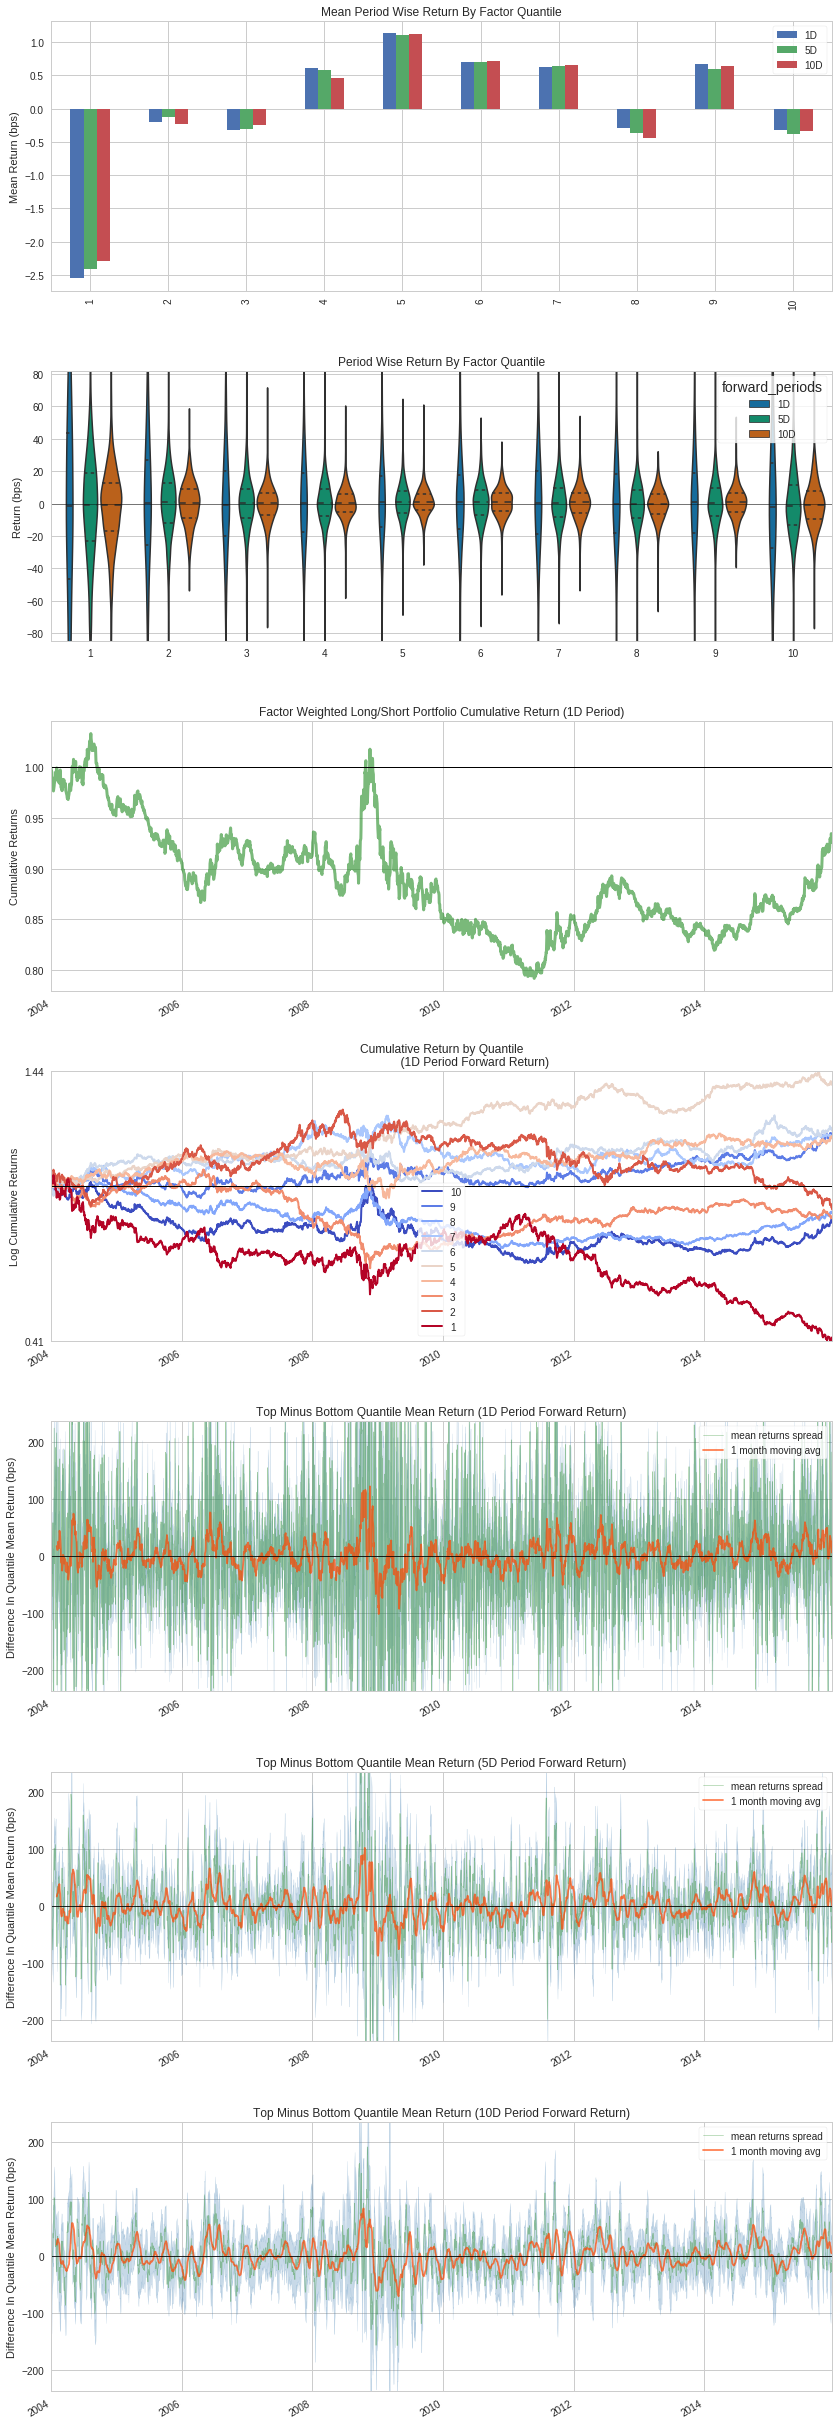

In [34]:
create_returns_tear_sheet(merged_data)